In [1]:
#import the required libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Numpy arrays are the object central to most operations. These are just matrices
A = np.array([[0.1, 2],
             [-4, 1.3]])

b = np.array([[0.2],
              [-1.0]])

We can perform matrix operations

$A \cdot b$

In [3]:
print(np.dot(A, b))
print("\n")  #or similarly
print(A.dot(b))

[[-1.98]
 [-2.1 ]]


[[-1.98]
 [-2.1 ]]


And we can solve matrix equations

$Ax = b$  
$x = A^{-1}b$

In [4]:
A_inv = np.linalg.inv(A)
x = A_inv.dot(b)
print(x)

[[0.27798278]
 [0.08610086]]


In [5]:
#generate some data

#We use the random module to access random sampling functions
#https://docs.scipy.org/doc/numpy/reference/routines.random.html
#we uniformly sample 1,000, 2 dimensional values between -5 and 5
#this gives a 1000x2 array of values
X = np.random.uniform(-5,5,(1000,2))

#the true model where the output values are perturbed by noise
#reflective of noisy measurements
alpha = np.array([[3.0], 
              [-1.0]])
Y = X.dot(alpha) + np.random.normal(0,1,size=(1000,1))

The array $X$ is 1000 x 2, 1000 rows of samples, with each of the two columns being a feature of the sample. Each row of Y looks like:

$y_{i} = \alpha_{1} x_{i}, 1 + \alpha_{2} x_{i}, 2 + \epsilon_{i}$

or in matrix notation

$Y = Xw + \epsilon$

and the goal of linear regression is to use the data samples of inputs $X$ and outputs $Y$ to determine the true value of $\alpha = \big \langle \alpha_{1}, \alpha_{2} \big \rangle$ with the assumption that the outputs $Y$ are a linear function of the data features $X$. We can look at the data we’ve generated:

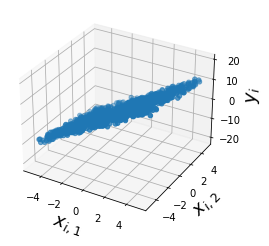

In [6]:
#using matplot lib we scatter plot y_i as a function of x_i,1, x_i,2
from mpl_toolkits.mplot3d import Axes3D #import this so we can plot 3D data

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

#notice below when we use ":" it allows us to select all the elements along that dimension of the array
ax.scatter(X[:,0], X[:,1], Y[:,])
ax.set_xlabel("$x_{i,1}$", fontsize = 18)
ax.set_ylabel("$x_{i,2}$", fontsize = 18)
ax.set_zlabel('$y_{i}$', fontsize = 18)
plt.show()

In [ ]:
#https://cpatdowling.github.io/notebooks/regression

In [7]:
cov = np.dot(X.T, X) #the first half, X.T is the transpose of numpy array X
cov_i = np.linalg.inv(cov) #take the inverse; count your blessings everytime you compute an inverse
right = np.dot(X.T, Y)
omega = np.dot(cov_i, right)

#we can also compute omega using numpy array's builtint dot product method, like this:

omega = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)  #w = (X^T X)^(-1) X^T Y

In [8]:
#check out omega versus alpha
print(omega)
print("\n")
print(alpha)

[[ 2.99839939]
 [-0.99605901]]


[[ 3.]
 [-1.]]


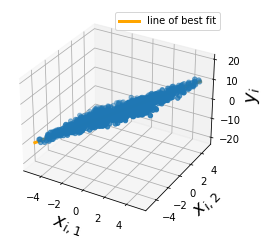

In [9]:
#and we can plot our line of best fit

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_1_ran = np.arange(np.min(X[:,0]), np.max(X[:,1]), 0.1)
x_2_ran = np.arange(np.min(X[:,1]), np.max(X[:,1]), 0.1)
X_ran = np.vstack((x_1_ran, x_2_ran)).T
hat_y = X_ran.dot(omega)  # this is compute the estimate outputs y = Xw

ax.plot(x_1_ran, x_2_ran, hat_y[:,0], color="orange", lw=3, label='line of best fit')
ax.scatter(X[:,0], X[:,1], Y[:,])
ax.set_xlabel("$x_{i,1}$", fontsize=18)
ax.set_ylabel("$x_{i,2}$", fontsize=18)
ax.set_zlabel('$y_{i}$', fontsize=18)
ax.legend()

plt.show()

In [ ]:
#https://cpatdowling.github.io/notebooks/regression_2

In [ ]:
#https://cpatdowling.github.io/notebooks/classification_1